# Introduction to Probability Density
## Statistics for Data Science
---

## What is Probability Mass?

Probability is sometimes thought of as a *mass*, so that a distribution of probability over outcomes is a physical object which is "heavier" on some outcomes,

In [1]:
from fractions import Fraction as F; F.__repr__ = F.__str__


In [2]:
def pmf(outcome):
    return {
        0: F(15)/100,
        1: F(35)/100,
        2: F(50)/100
    } [outcome]


In [3]:
pmf(0)


3/20

A probability mass function is a function which returns probabilities for discrete events. 

In [4]:
import seaborn as sns

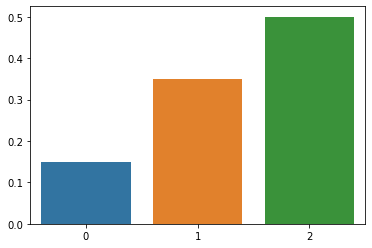

In [5]:
sns.barplot(x=[0,1,2], y=[ pmf(e) for e in [0,1,2]]);


## What is Probability Density?

Probability can be defined on real-valued events, eg., that a height is 1.81m. However, real-numbers are 'infinintely precise', there is always a number between any two. 

This makes it hard to distribute a probability mass over all outcomes, as there are *infinitely many*. Rather than do this, we divide the probability by an area (a range of outcomes) and call it a *density*.

To recover an actual probability we must multiply the *density* by the area (ie., range) of interest. 

In [6]:
def pdf(outcome):
    if 0 < outcome <= 10:
        return 1/10
    else:
        return 0
    

In [7]:
outcomes = [-1, 0, 1.1, 1.3, 4.4, 5.6, 9,11]


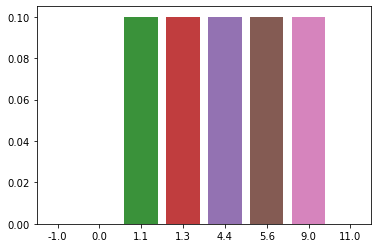

In [8]:
sns.barplot(x=outcomes, y=[pdf(o) for o in outcomes]);


Note that the sum over the range $(0, 10]$ is infinite as there are an infinite number of outcomes in this interval,

In [9]:
from random import random

for n in range(0, 100_000, 10_000):

    outcomes = [10 * random() for _ in range(n)]
    
    print( sum([pdf(o) for o in outcomes]) )
    

0
1000.0000000001588
1999.9999999992765
2999.999999998367
3999.9999999974575
5000.0000000006585
6000.000000004296
7000.000000007934
8000.000000011572
9000.00000001521


The *probability* of an event is only defined for a density *range*,

$P( 1.8 < H <= 1.81 ) = \text{Area }_{1.8}^{1.81}(pdf) = \int_{1.8}^{1.81} pdf $

In [10]:
from scipy.integrate import quad as areaof


In [11]:
areaof(pdf, 1, 2)[0]


0.10000000000000002

In [12]:
areaof(pdf, 1.8, 1.81)[0]


0.001000000000000001

Here you can see that as we consider narrower ranges, the probability decreases -- this resolves the problem of distributing mass over an infinite number of points: as the size of the point decreases (ie., as our range narrows) we allocate less probability.

## How do you define a normal distribution?

In [13]:
from math import pi, exp


In [14]:
import seaborn as sns

In [15]:
def normal(outcome, m=100, s=15):
    v = 2 * s ** 2
    c = (pi * v) ** -0.5
    
    return c * exp( - ((outcome - m) ** 2) / v )


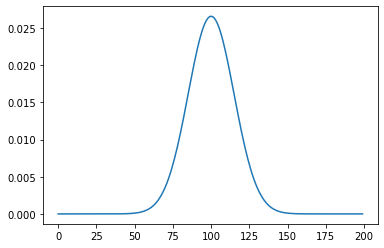

In [16]:
distIQ = [ normal(x) for x in range(0, 200) ]
sns.lineplot(x=range(0, 200), y=distIQ);


## How do you compute probabilities from densities?

In [17]:
from scipy.integrate import quad as areaof


In [18]:
def pdfIQ(event_from=float('-inf'), event_to=float('+inf')):
    return round( areaof(normal, event_from, event_to)[0], 4) 


In [19]:
pdfIQ(0, 100)


0.5

In [20]:
pdfIQ(75, 125)


0.9044

In [21]:
pdfIQ(145)


0.0013

## How do you visualize the area ?

In [22]:
from ipywidgets import interact
import matplotlib.pyplot as plt 

@interact(low=85, high=115)
def draw(low, high):
    plt.axvline(low, color='red')
    plt.axvline(high, color='red')
    plt.plot(range(0, 200), distIQ)
    plt.title(f"P({low} < IQ < {high}) = {pdfIQ(low, high): .3f}")
    

interactive(children=(IntSlider(value=85, description='low', max=255, min=-85), IntSlider(value=115, descripti…

## How do use pre-built distributions?

In [23]:
import numpy as np

In [24]:
from scipy.stats import norm


In [25]:
x = np.linspace(-3,+3, 10)


In [26]:
norm.pdf(x)


array([0.00443185, 0.02622189, 0.09947714, 0.24197072, 0.37738323,
       0.37738323, 0.24197072, 0.09947714, 0.02622189, 0.00443185])

In [27]:
norm.cdf(x)


array([0.0013499 , 0.00981533, 0.04779035, 0.15865525, 0.36944134,
       0.63055866, 0.84134475, 0.95220965, 0.99018467, 0.9986501 ])

In [28]:
np.random.normal()


-0.6748844486039464

## What's a cumulative density function?

A cumulative density function records the change in the area of a probability density function; they are often easier to interpret and more helpful than pdfs, 

## How do you sample means from a distribution?

A company awards a $5\%$ bonus + a percentage uniformly distributed over $[0, 10)$, determined by a lottery.

In [29]:
X = 5 + np.random.uniform(0, 10, 1_000); X[:5]


array([11.94354568, 13.32873399,  5.97495666, 12.27050742,  8.06461074])

this is NOT normally distributed

**means** of **samples** will be normally distributed

In [30]:
import seaborn as sns

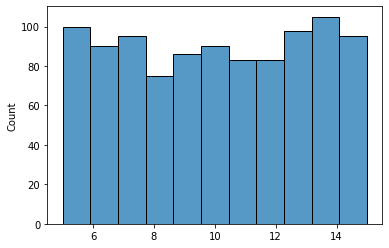

In [31]:
sns.histplot(X);


this is NOT normally distributed

**means** of **samples** will be normally distributed

In [32]:
sample_size, sample_trials = 100, 500

X_means = np.random.choice(X, (sample_size, sample_trials)).mean(axis=1)


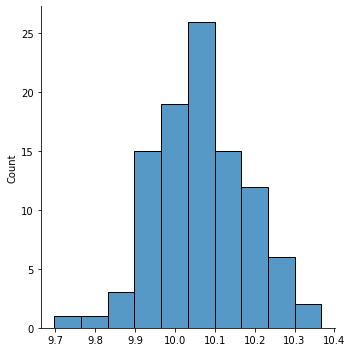

In [33]:
sns.displot(X_means);


We can compare two underlying distributions *of almost any type*, by a comparsion of their means via the normal distribution. 


In [34]:
X1 = 4 + np.random.uniform(0, 10, 1_000)
X2 = 2 + np.random.uniform(3, 11, 1_000)


In [35]:
X1m = np.random.choice(X1, (100, 500)).mean(axis=1)
X2m = np.random.choice(X2, (100, 500)).mean(axis=1)


In [36]:
X1m.mean(), X1m.std(), X2m.mean(), X2m.std()


(9.088888078268289,
 0.13043476424660153,
 8.946205949551361,
 0.09791825893450298)

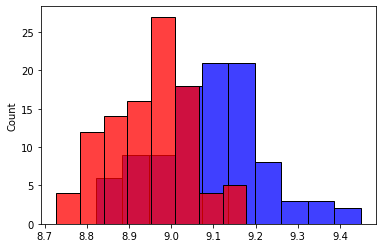

In [37]:
sns.histplot(X1m, color="blue")
sns.histplot(X2m, color="red");


## How do I standardize a normal distribution?

If we rescale a distribution so it matches the pdf form of a normal distribution we can specify probabilities for individual observations...

In [38]:
Z1 = (X1m - X1m.mean())/X1m.std()


In [39]:
np.isclose(Z1.mean(), 0), np.isclose(Z1.std(), 1)


(True, True)

The first ten means...

In [40]:
X1m[:10]


array([9.19069809, 8.88637715, 9.04402695, 9.14892467, 9.06948496,
       9.23376353, 9.14329742, 9.08910455, 9.05340017, 9.1016077 ])

The probability, $P(x \leq X1m)$

In [41]:
norm.cdf(Z1[:10])


array([0.78246448, 0.06026127, 0.36544746, 0.6773426 , 0.44087258,
       0.86665382, 0.6617114 , 0.50066208, 0.39278255, 0.53884213])